## Curse of dimensionality

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
class Stat:
    def __init__(self, k_dim: list) -> None:
        self.ctr = {}
        self.min_dist = {}
        self.max_dist = {}
        self.mean_dist = {}
        self.variance = {}
        for k in k_dim:
            self.ctr[k] = []
            self.min_dist[k] = []
            self.max_dist[k] = []
            self.mean_dist[k] = []
            self.variance[k] = []


def Lp_norm(data: np.ndarray, p: float) -> np.floating:
    if p == np.inf:
        return np.max(np.abs(data))
    
    return np.sum(np.abs(data) ** p) ** (1/p)

In [56]:
dimensions = list(range(2,6)) + list(range(10,101,10)) + list(range(100,50,300)) # add more experimental k dimension here
p_range = [0.5,0.8,1,1.3,1.5,1.7,1.9,1.95,2,5,np.inf] # add more experimental p-value here
N = 100 # number of data points
q = 100 # number of data sets

stats_p = [Stat(dimensions) for _ in range(len(p_range))]

for k in dimensions:
    data_shape = (N,k)

    for _ in range(q):
        # half-open interval [0,1)
        data_points = np.random.uniform(low=0, high=1, size=data_shape)

        for i_p,p in enumerate(p_range):
            dists = [Lp_norm(point, p) for point in data_points]
            
            Dmin = np.min(dists)
            Dmax = np.max(dists)
            ctr = (Dmax - Dmin) / Dmin

            stats_p[i_p].min_dist[k].append(Dmin)
            stats_p[i_p].max_dist[k].append(Dmax)
            stats_p[i_p].ctr[k].append(ctr)
            stats_p[i_p].mean_dist[k].append(np.mean(dists))
            stats_p[i_p].variance[k].append(np.var(dists))


In [57]:
# Question 4
# stats_k_avg = {k:Stat(p_range) for k in dimensions}
stats_k_avg: dict[int, Stat] = {}
for k in dimensions:
    stats_k_avg[k] = Stat(k_dim=p_range)

    for i_p,p in enumerate(p_range):
        stats_k_avg[k].min_dist[p] = np.mean(stats_p[i_p].min_dist[k])
        stats_k_avg[k].max_dist[p] = np.mean(stats_p[i_p].max_dist[k])
        stats_k_avg[k].ctr[p] = np.mean(stats_p[i_p].ctr[k])
        stats_k_avg[k].mean_dist[p] = np.mean(stats_p[i_p].mean_dist[k])
        stats_k_avg[k].variance[p] = np.mean(stats_p[i_p].variance[k])


    


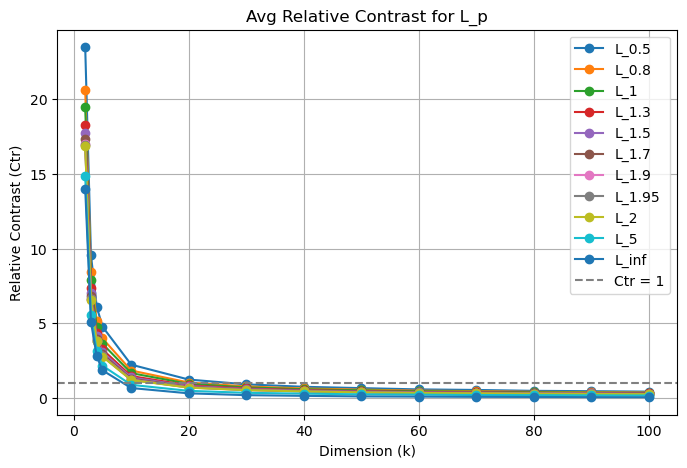

In [58]:
# Plot results as a function of k dimension (x-axis)
# a) all relative contrasts Ctr(Lp) in one plot (5 curves corresponding to 5 p-values). y-axis is Ctr
threshold = 1

plt.figure(figsize=(8,5))
for p in p_range:
    ctr_vals = [stats_k_avg[k].ctr[p] for k in dimensions]

    plt.plot(dimensions, ctr_vals, label=f'L_{p}', marker='o')


plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Ctr = {threshold}')

plt.xlabel('Dimension (k)')
plt.ylabel('Relative Contrast (Ctr)')
plt.title('Avg Relative Contrast for L_p')
plt.legend()

plt.grid()
plt.show()

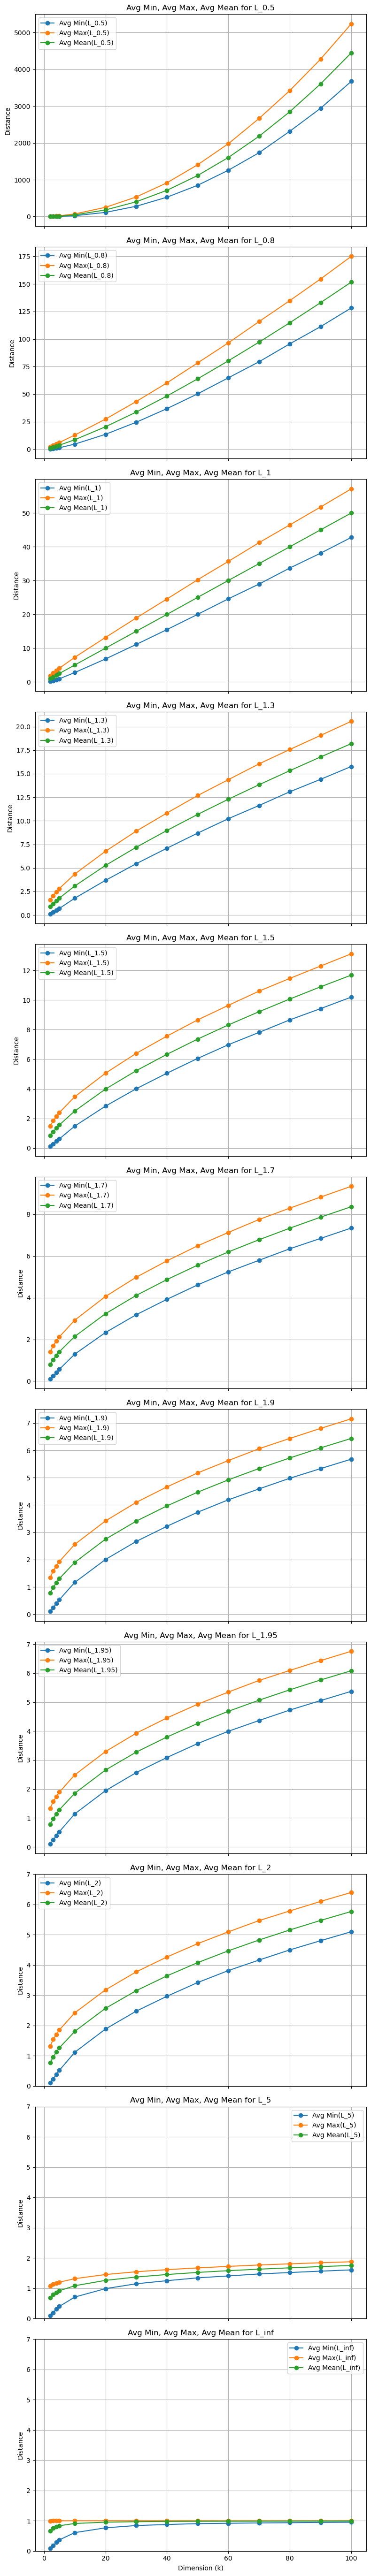

In [59]:
# b) One plot for each Lp showing average minimum, maximum and mean distances
num_plots = len(p_range)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 5 * num_plots), sharex=True)


for idx,p in enumerate(p_range):
    y_lim = None
    # Use the same scale for plots of L_2,L_5, and L_inf
    if p in [2,5,np.inf]:
        y_lim = (0,7)


    min_vals = [stats_k_avg[k].min_dist[p] for k in dimensions]
    max_vals = [stats_k_avg[k].max_dist[p] for k in dimensions]
    mean_vals = [stats_k_avg[k].mean_dist[p] for k in dimensions]

    ax = axes[idx]

    ax.plot(dimensions, min_vals, label=f'Avg Min(L_{p})', marker='o')
    ax.plot(dimensions, max_vals, label=f'Avg Max(L_{p})', marker='o')
    ax.plot(dimensions, mean_vals, label=f'Avg Mean(L_{p})', marker='o')

    ax.set_ylabel('Distance')
    ax.legend()
    ax.grid()
    ax.set_title(f'Avg Min, Avg Max, Avg Mean for L_{p}')

    if y_lim is not None:
        ax.set_ylim(y_lim)

# Shared x-label for all subplots
axes[-1].set_xlabel('Dimension (k)')

plt.tight_layout()
plt.show()

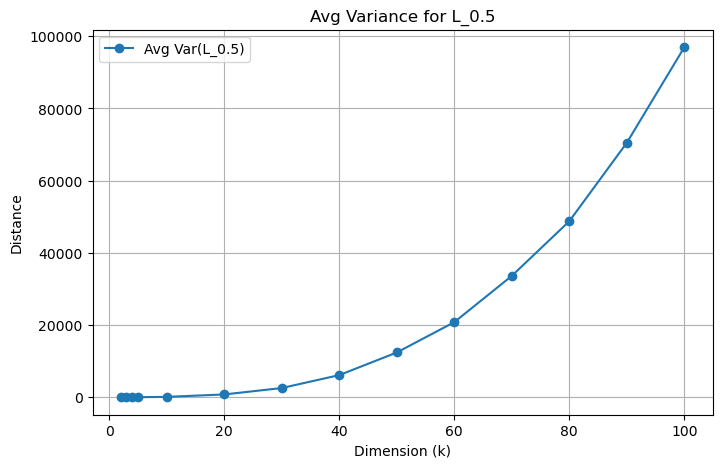

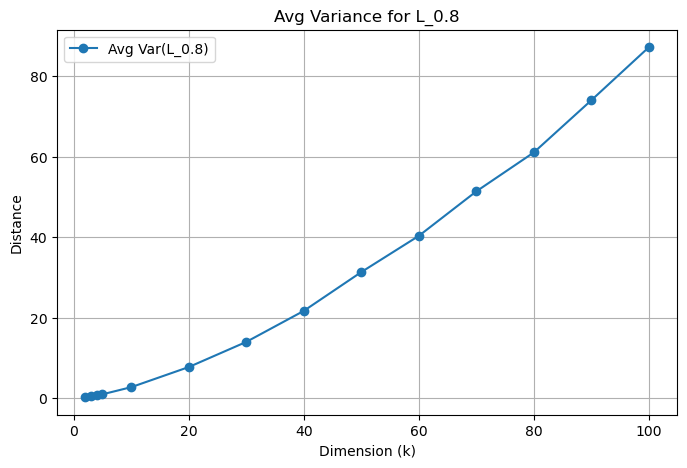

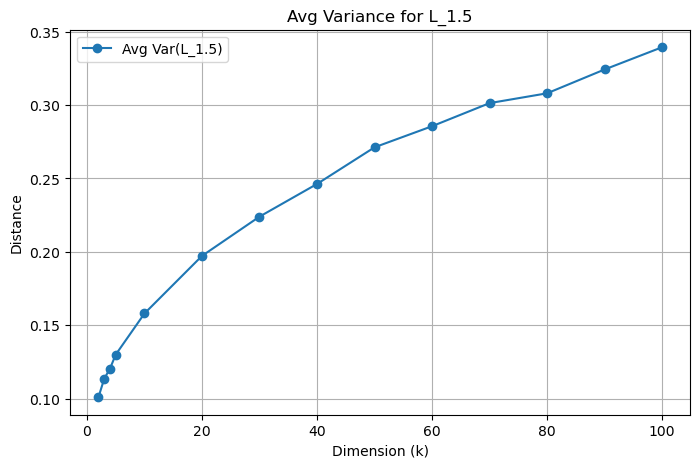

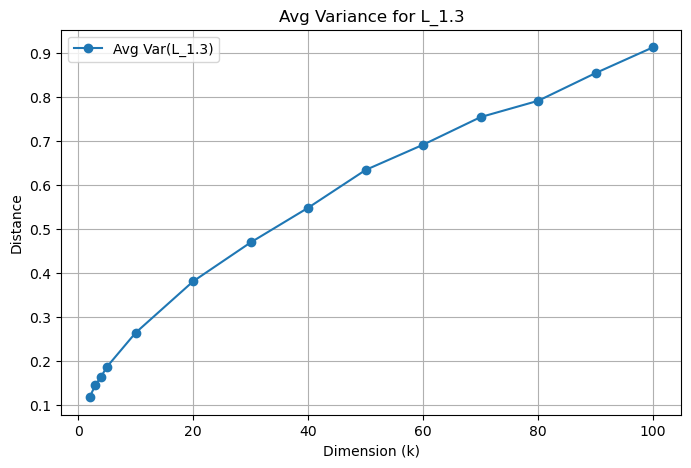

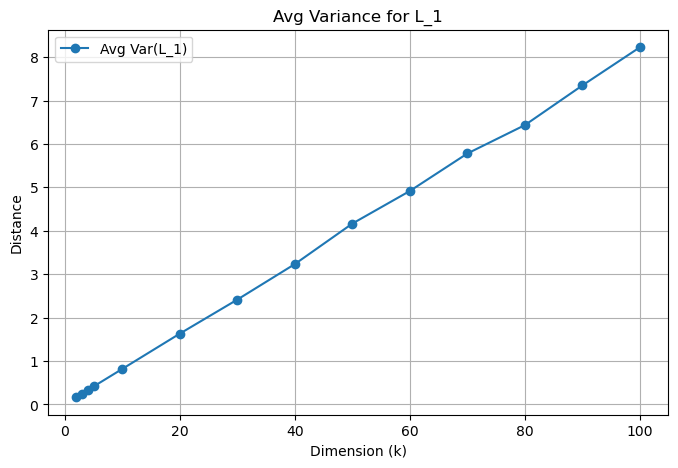

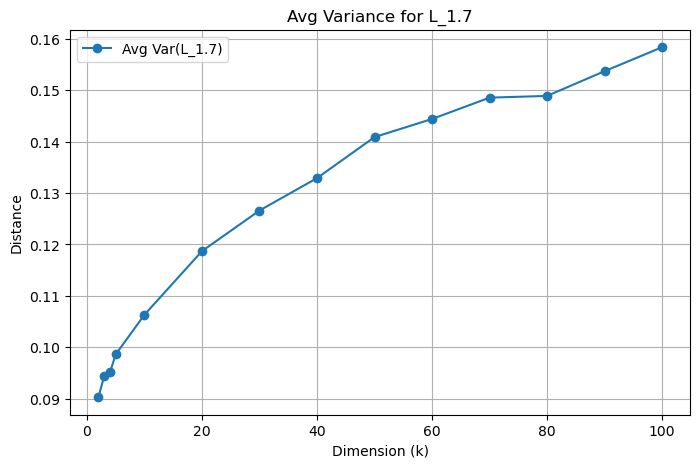

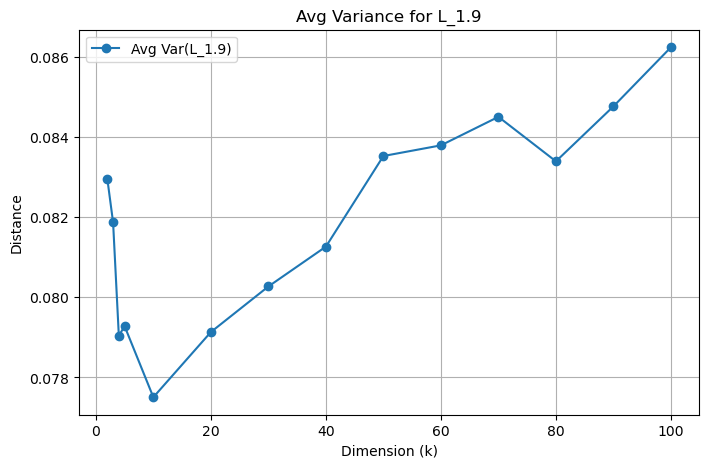

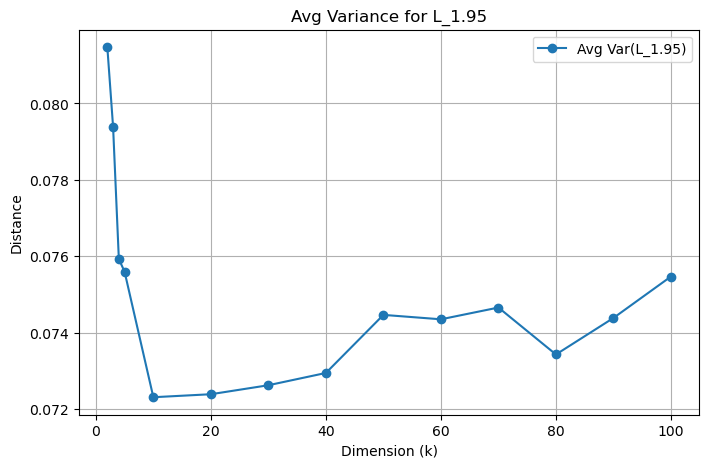

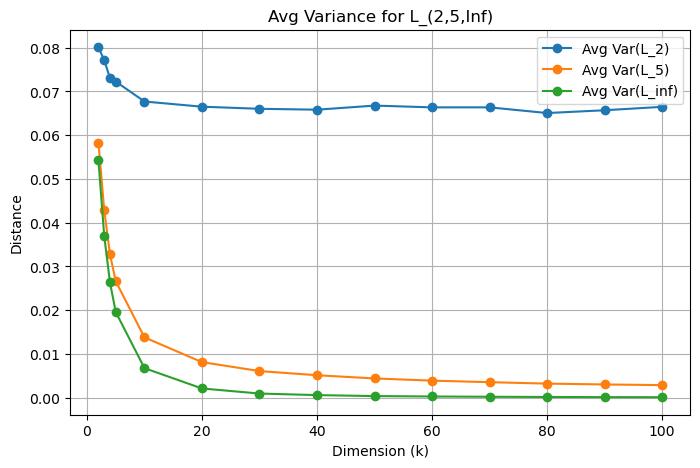

In [60]:
# c) One plot for each Lp showing average variance of the distance
# plots for the following p-values are on the same scale
same_scale_set = set([2,5,np.inf])
# plots for the following p-values are on different scales
diff_scale_set = set(p_range) - same_scale_set


for p in diff_scale_set:
    var_vals = [stats_k_avg[k].variance[p] for k in dimensions]
    
    plt.figure(figsize=(8,5))
    plt.plot(dimensions, var_vals, label=f'Avg Var(L_{p})', marker='o')

    plt.ylabel('Distance')
    plt.xlabel('Dimension (k)')
    plt.title(f'Avg Variance for L_{p}')
    plt.grid()
    plt.legend()

    plt.show()


plt.figure(figsize=(8,5))
for p in same_scale_set:
    var_vals = [stats_k_avg[k].variance[p] for k in dimensions]
    
    plt.plot(dimensions, var_vals, label=f'Avg Var(L_{p})', marker='o')

    plt.ylabel('Distance')
    
    plt.grid()
    plt.legend()

plt.xlabel('Dimension (k)')
plt.title(f'Avg Variance for L_(2,5,Inf)')
plt.show()
